# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset

In [2]:
data = pd.read_excel(r"C:\Users\sravi\Downloads\ICTAK\supervised learning\iris.xls")
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Basic information about dataset

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# Statistical information about data

In [4]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Finding null values

In [5]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

* There is null values. So we have to fill it.

# We will check the skewness.

* if the skewness value < -1 or > +1 -- Highly skewed distribution
* if the skewness value is between -1 & -1/2 or between +1/2 & +1 -- Moderately skewed distribution
* if the skewness value between -1/2 & +1/2 -- Approximately symmetric distribution

In [6]:
print('Skewness of SL: ',data['SL'].skew())
print('Skewness of SW: ',data['SW'].skew())
print('Skewness of PL: ',data['PL'].skew())

Skewness of SL:  0.3068227108046868
Skewness of SW:  0.37781843718771746
Skewness of PL:  -0.2689053923783847


* We can see all are highly skewed. Only PL is negatively skewed, others are positively skewed.

# Graphical representation of SL,SW,PL and PW

array([[<Axes: title={'center': 'SL'}>, <Axes: title={'center': 'SW'}>],
       [<Axes: title={'center': 'PL'}>, <Axes: title={'center': 'PW'}>]],
      dtype=object)

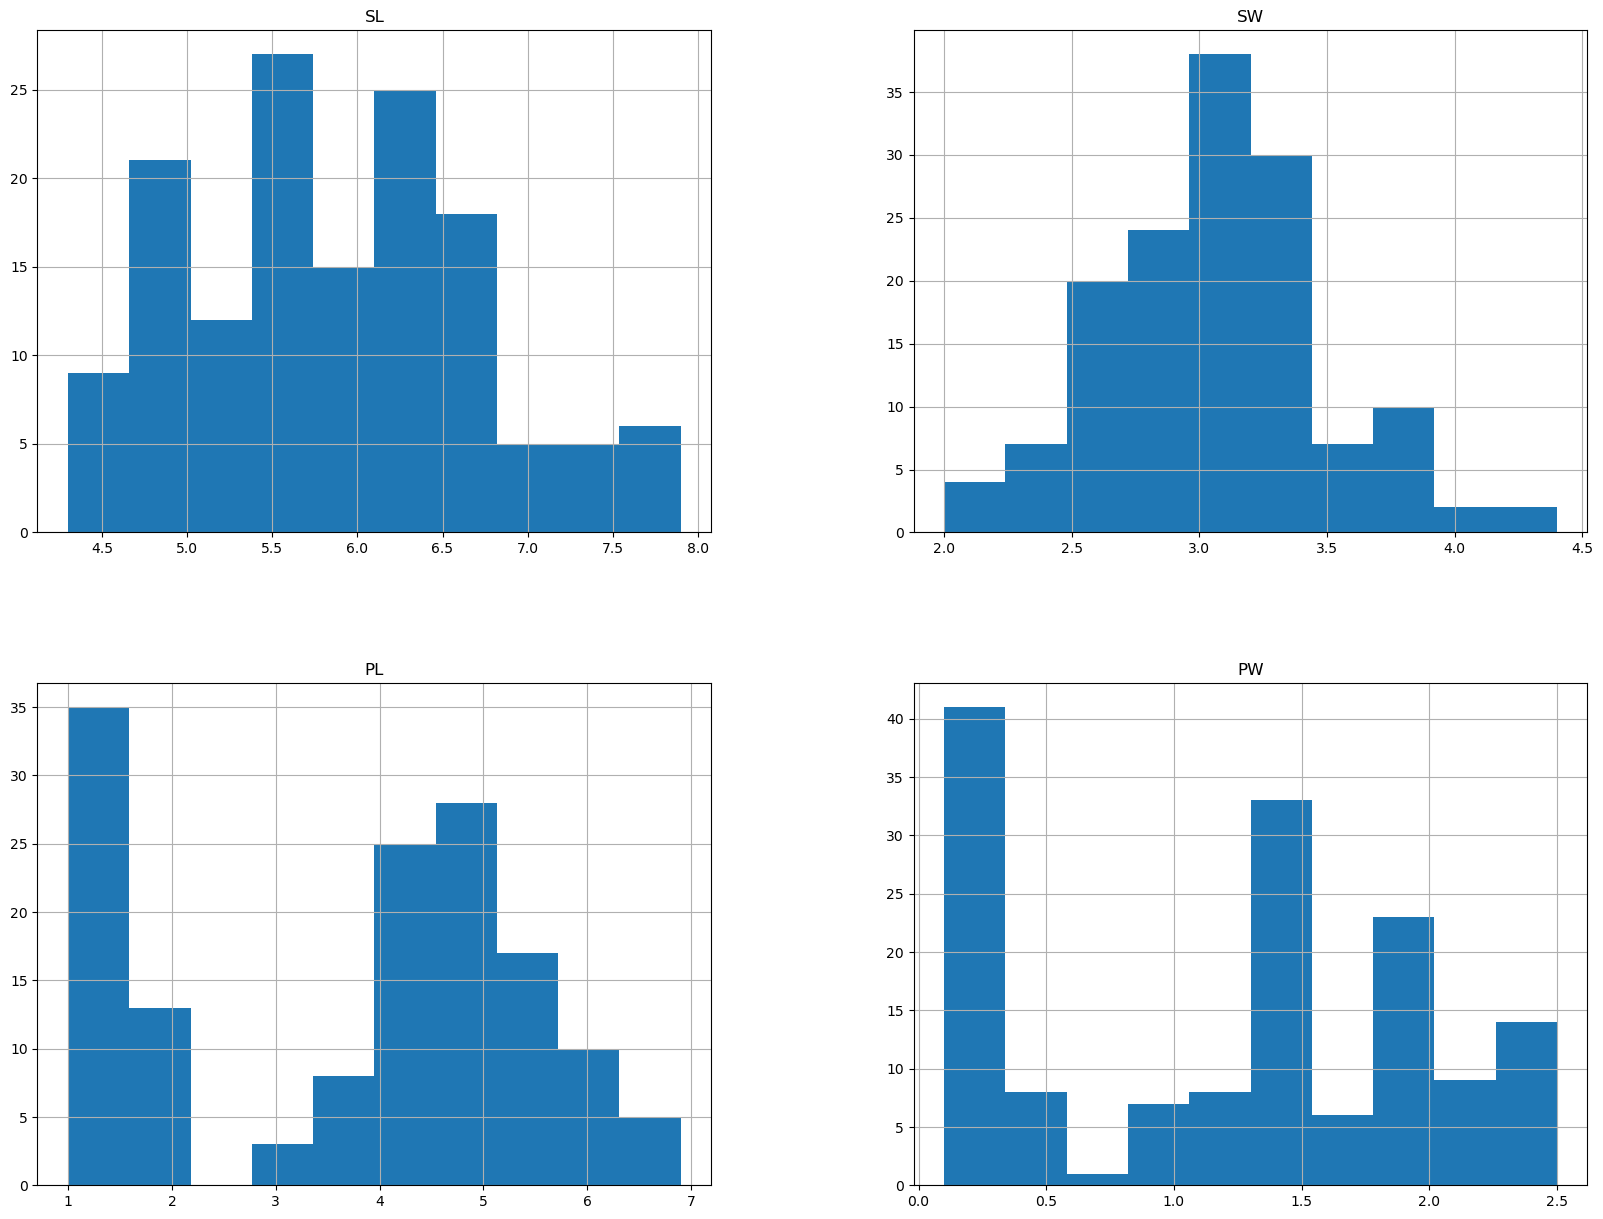

In [7]:
freqgraph = data.select_dtypes(include='float64')
freqgraph.hist(figsize=(20,15))

# Fill the null values

* Since the features are highly skewed. we can use median to fill the data.

In [8]:
for i in ['SL','SW', 'PL']:
    data[i] = data[i].fillna(data[i].median())

In [9]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

* Filled the null values

# Checking for outliers

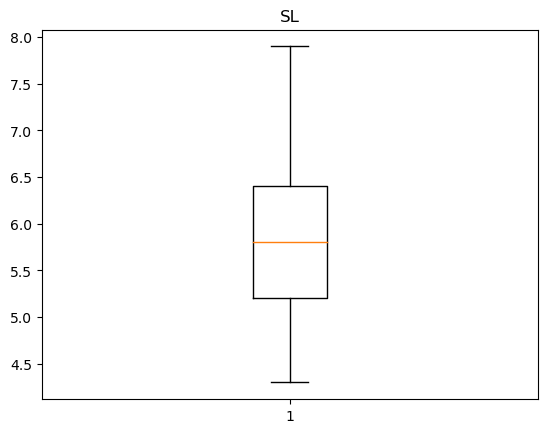

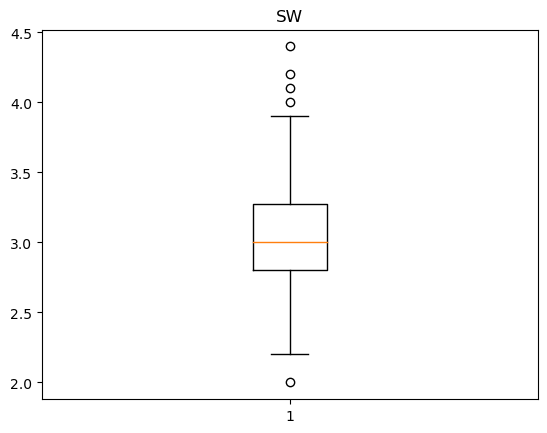

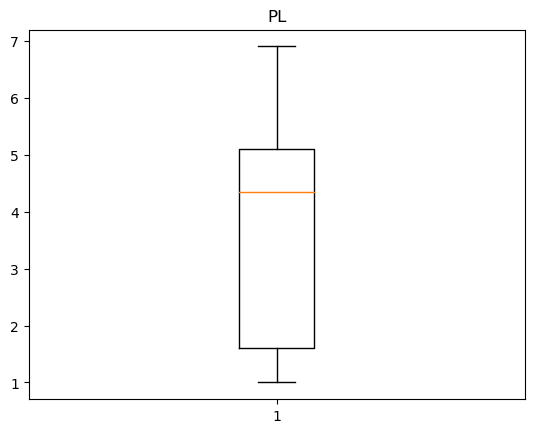

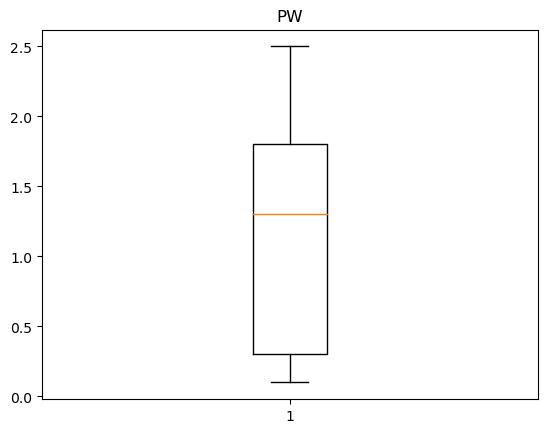

In [10]:
columns=['SL','SW','PL','PW']

for i in columns:
    plt.figure()
    plt.boxplot(data[i])
    plt.title(i)

# Removing the outliers 

* Only SW has outliers and it is very less. If the outliers is less it's not necessary to remove outliers. Anyway we are removing.

In [11]:
Q1=np.percentile(data['SW'],25,method='midpoint')
Q2=np.percentile(data['SW'],50,method='midpoint')
Q3=np.percentile(data['SW'],75,method='midpoint')

IQR=Q3-Q1

low_lim = Q1 -1.5*IQR
up_lim = Q3+1.5*IQR

print("lower value: ",low_lim)
print("upper value: ",up_lim)

lower value:  2.1249999999999996
upper value:  3.9250000000000003


In [12]:
outliers=[]

for x in data['SW']:
    if((x<low_lim) or (x>up_lim)):
        outliers.append(x)
        
print(outliers)        
        

[4.0, 4.4, 4.1, 4.2, 2.0]


In [13]:
data['SW'] = data['SW'].clip(lower=low_lim,upper=up_lim)

outliers=[]

for x in data['SW']:
    if((x<low_lim) or (x>up_lim)):
        outliers.append(x)
        
print(outliers)        
        

[]


* Removed the outliers

# Let's encode the data

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Classification'] = le.fit_transform(data['Classification'])
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.40,0.2,0
1,4.9,3.0,1.40,0.2,0
2,5.8,3.2,1.30,0.2,0
3,4.6,3.1,1.50,0.2,0
4,5.0,3.6,1.40,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.20,2.3,2
146,6.3,2.5,5.00,1.9,2
147,6.5,3.0,4.35,2.0,2
148,6.2,3.4,5.40,2.3,2


# Let train and test the data

In [16]:
X = data.drop('Classification',axis=1)
y = data['Classification']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)

# Implementing each classification model to get best result

### * Logistic Regression Model

In [17]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
log_reg.fit(X_train,y_train)
log_pred=log_reg.predict(X_test)

C:\Users\sravi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
confusion_matrix(y_test,log_pred)

array([[14,  1,  0],
       [ 0, 11,  0],
       [ 0,  0, 12]], dtype=int64)

In [19]:
print('Accuracy: ',accuracy_score(y_test,log_pred))

Accuracy:  0.9736842105263158


### * k- nearest neighbors (KNN) Model

In [20]:
from sklearn.neighbors import KNeighborsClassifier
metric_k=[]
neighbors=np.arange(3,15)

for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)
    classifier.fit(X_train,y_train)
    knn_pred=classifier.predict(X_test)
    accuracy=accuracy_score(y_test,knn_pred)
    metric_k.append(accuracy)

Text(0, 0.5, 'Metric k')

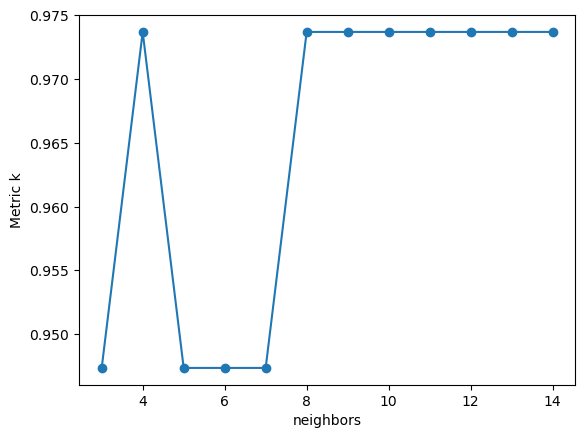

In [21]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('neighbors')
plt.ylabel('Metric k')

In [22]:
classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
classifier.fit(X_train,y_train)
knn_pred=classifier.predict(X_test)

In [23]:
confusion_matrix(y_test,knn_pred)

array([[14,  1,  0],
       [ 0, 10,  1],
       [ 0,  0, 12]], dtype=int64)

In [24]:
print('Accuracy: ',accuracy_score(y_test,knn_pred))

Accuracy:  0.9473684210526315


### * Support Vector Machine (SVM) Model

In [25]:
from sklearn.svm import SVC
sv_clf = SVC(kernel='linear')
sv_clf.fit(X_train,y_train)

SVC(kernel='linear')

In [26]:
y_pred=sv_clf.predict(X_test)

In [27]:
print(confusion_matrix(y_test,y_pred))

[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


In [28]:
from sklearn.metrics import accuracy_score,confusion_matrix
print('Accuracy score is :',accuracy_score(y_test,y_pred))

Accuracy score is : 1.0


### * Decision Tree Classifier Model

In [29]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train,y_train)
y_pred=dt_clf.predict(X_test)

In [30]:
print(confusion_matrix(y_test,y_pred))

[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


In [31]:
print('Accuracy score is :',accuracy_score(y_test,y_pred))

Accuracy score is : 1.0


### * Random Forest Classifier Model

In [32]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train,y_train)
y_pred=rf_clf.predict(X_test)

In [33]:
print(confusion_matrix(y_test,y_pred))

[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


In [34]:
print('Accuracy score is :',accuracy_score(y_test,y_pred))

Accuracy score is : 1.0


## Classification models which give best result are SVM, Decision Tree and Random Forest model. Because these models have best accuracy.